# ANALYZING THE DATASET THAT WE HAVE

In [141]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for seaborn
sns.set(style='whitegrid')

# Load your dataset
# Make sure to replace 'your_dataset.csv' with your actual dataset file
data = pd.read_csv('survey_results_public.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
x=data.isnull().sum()
print(x.to_string())

# Data type information
print(data.dtypes)

   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person) 

count               88013
unique                  7
top       25-34 years old
freq                33247
Name: Age, dtype: object


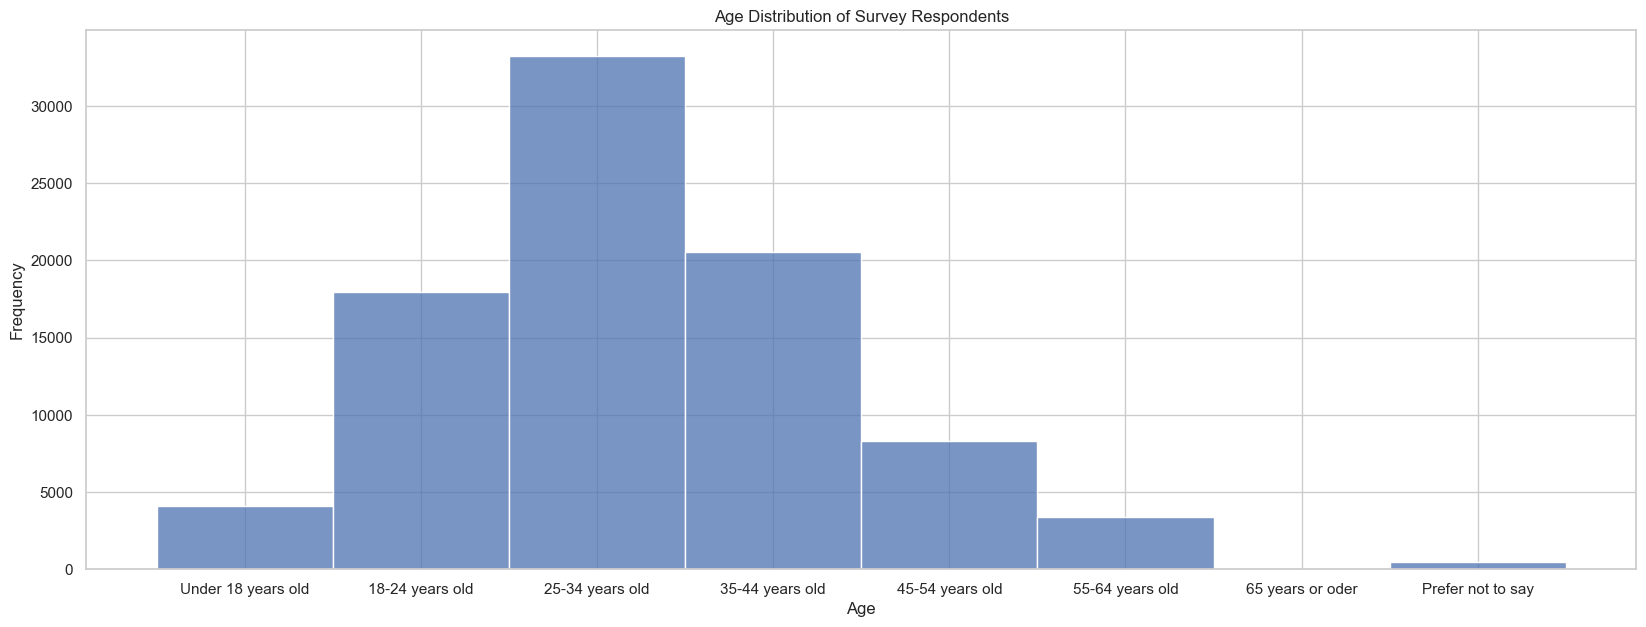

In [142]:
#Set the desired order of age categories
desired_order = ['Under 18 years old','18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or oder', 'Prefer not to say']

#Convert 'Age' to categorical type with the desired order
data['Age'] = pd.Categorical(data['Age'], categories=desired_order, ordered=True)

# Visualize the distribution of ages
plt.figure(figsize=(20, 7))

sns.histplot(data['Age'])
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate descriptive statistics for the 'Age' column
age_stats = data['Age'].describe()
print(age_stats)

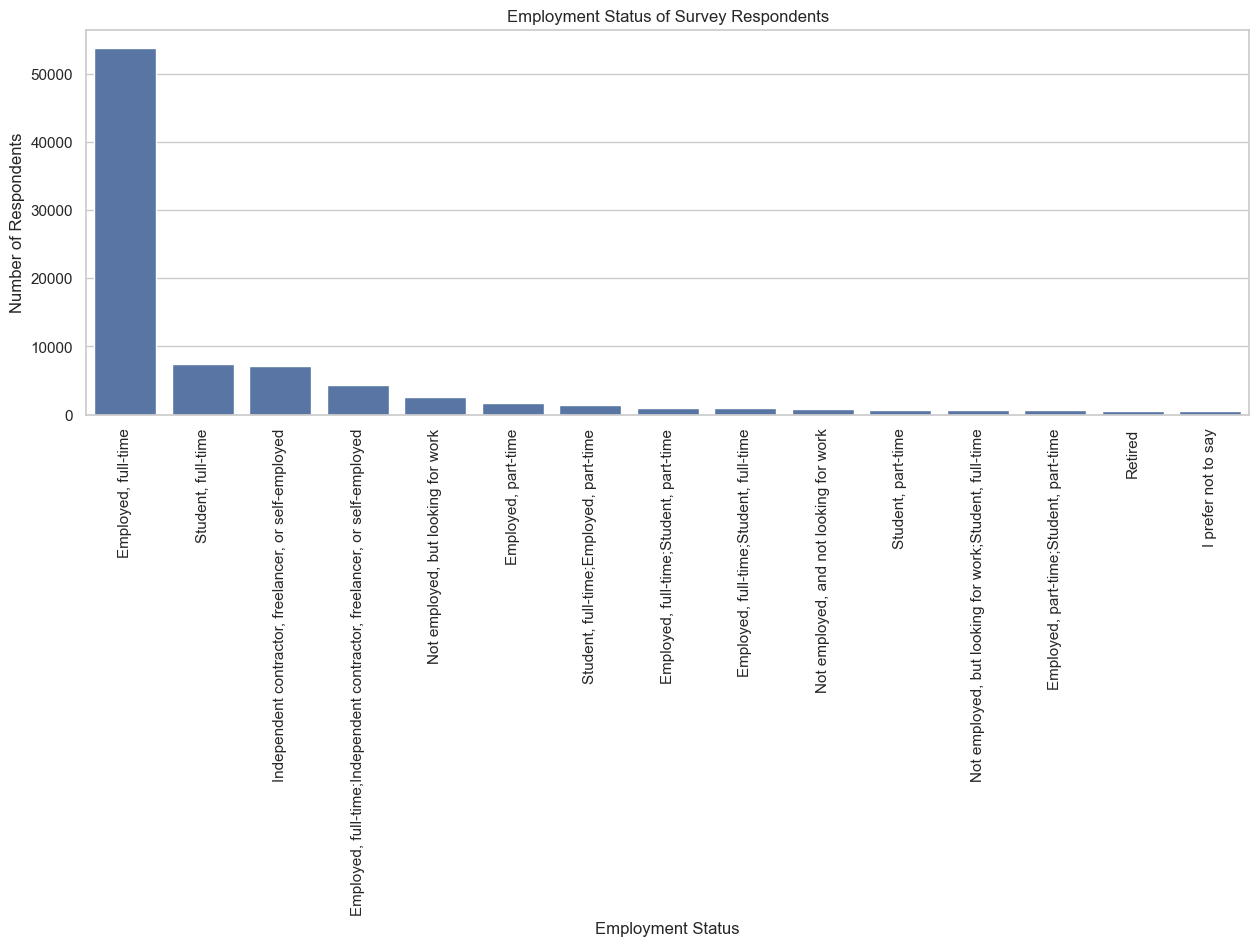

In [143]:
# Analyze employment status
employment_counts = data['Employment'].value_counts()

# Set a minimum threshold for significance
threshold = 500  # Minimum number of 500 respondents for a category to be significant

# Filter out less significant categories
filtered_employment_counts = employment_counts[employment_counts >= threshold]

# Create a bar plot for the filtered employment statuses
plt.figure(figsize=(15, 5))
sns.barplot(x=filtered_employment_counts.index, y=filtered_employment_counts.values)
plt.title('Employment Status of Survey Respondents')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

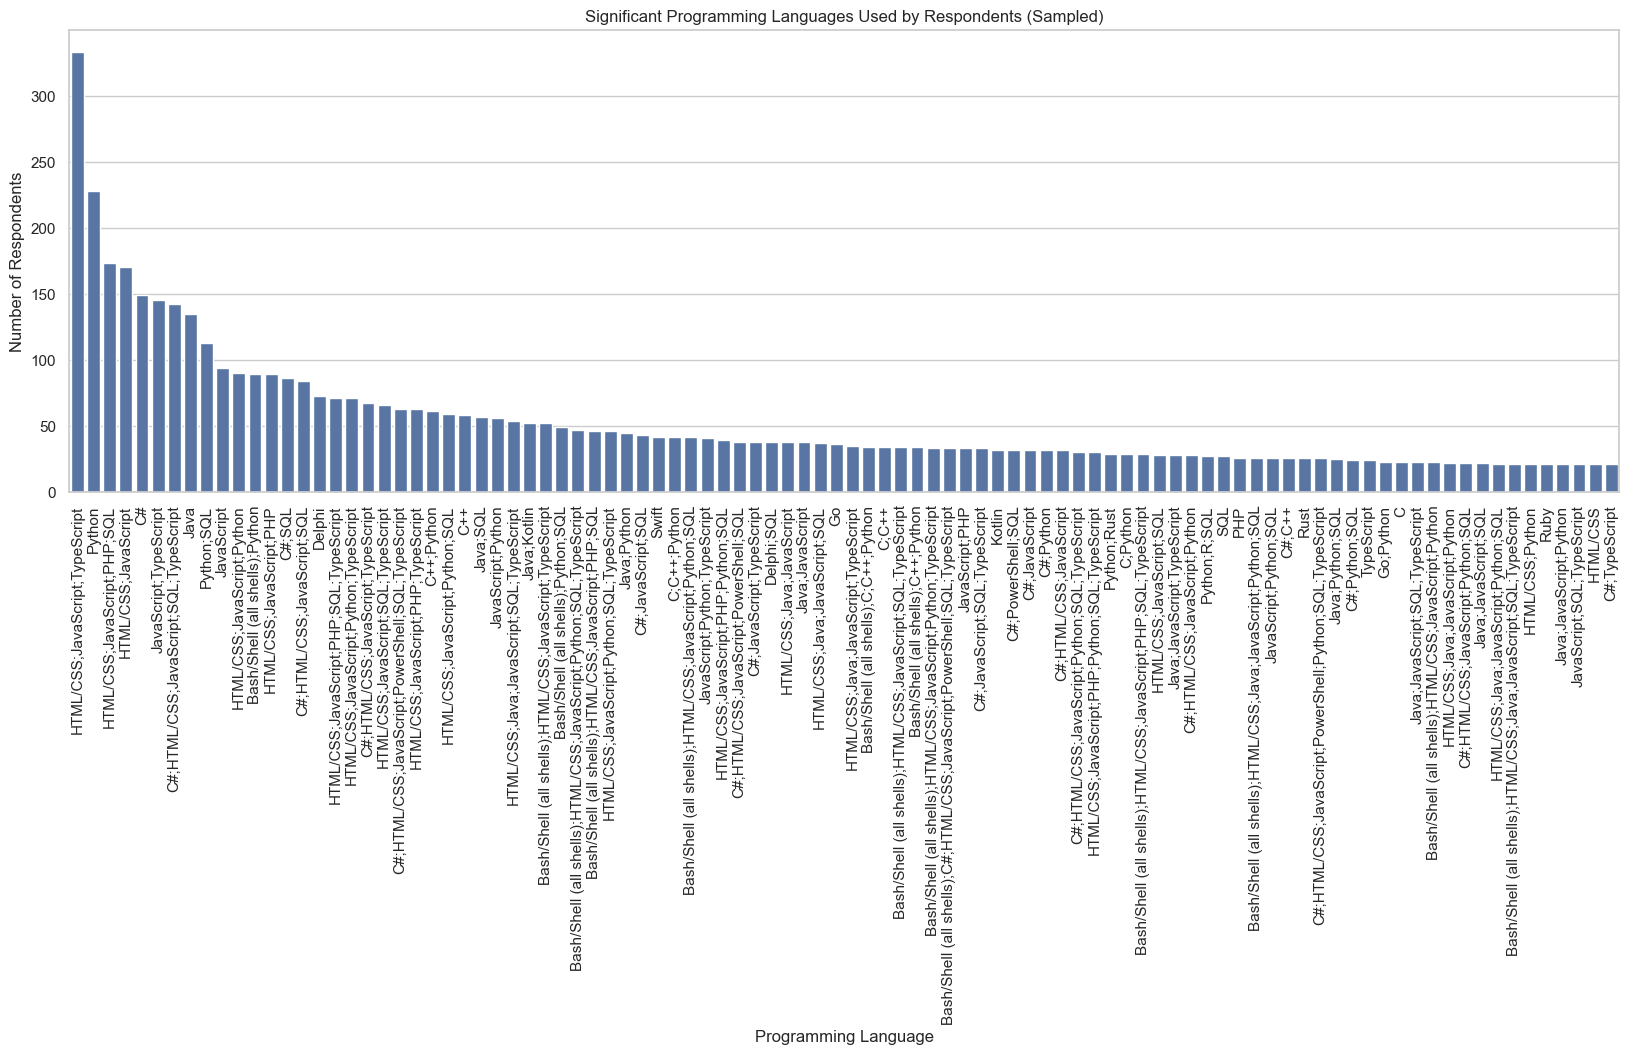

In [131]:
# Set the sample size for downsampling
sample_size = 20000  # Adjust according to your needs

# Randomly sample the data
datad = data['LanguageHaveWorkedWith'].sample(n=sample_size, random_state=1)

# Analyze programming languages used
language_counts = datad.str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Set a significance threshold (e.g., minimum number of respondents)
threshold = 20  # Adjust this based on your requirements

# Filter significant results
significant_languages = language_counts[language_counts > threshold]

# Create a bar plot for the significant programming languages
plt.figure(figsize=(20, 6))
sns.barplot(x=significant_languages.index, y=significant_languages.values)
plt.title('Significant Programming Languages Used by Respondents (Sampled)')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analyze employment status
jobsat_counts = data['JobSat'].value_counts()

# Set a minimum threshold for significance
threshold = 500  # Minimum number of 500 respondents for a category to be significant

# Filter out less significant categories
filtered_jobsat_counts = jobsat_counts[jobsat_counts >= threshold]

# Create a bar plot for the filtered employment statuses
plt.figure(figsize=(15, 5))
sns.barplot(x=filtered_jobsat_counts.index, y=filtered_jobsat_counts.values)
plt.title('Employment Status of Survey Respondents')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()